#                    Covid-19 Vaccines Analysis

# Importing Necessary Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data Loading and Extraction

In [68]:
df = pd.read_csv('country_vaccinations.csv')
df0 = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [22]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [28]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

# Handling Missing Values

In [23]:
df.fillna({'total_vaccinations': 0,
'people_vaccinated': 0,
'people_fully_vaccinated':0,
'daily_vaccinations_raw':0,
'daily_vaccinations':0,
'total_vaccinations_per_hundred': 0,
'people_vaccinated_per_hundred': 0,
'people_fully_vaccinated_per_hundred' :0,
'daily_vaccinations_per_million':0}, inplace=True)

In [24]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [25]:
df['date'] = pd.to_datetime(df['date'])
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [78]:
#Checking For Duplicate values
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website


All the Duplicates values are dropped.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

In [30]:
#Dropping unwanted
df1 = df1.drop((['vaccines','source_name','source_website']), axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               86512 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       86512 non-null  float64       
 9   people_vaccinated_per_hundred        86512 non-null  float64       
 10  people_ful

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['country']=le.fit_transform(df2['country'])
df2['iso_code']=le.fit_transform(df2['iso_code'])

df2['vaccines']=le.fit_transform(df2['vaccines'])

df2['source_name']=le.fit_transform(df2['source_name'])

df2['source_website']=le.fit_transform(df2['source_website'])
# df2['date'] = df2['date'].str.replace('-', ' ')


# Machine Learning in Python

# Testing and Training

In [41]:
x=df2[['country', 'iso_code','people_vaccinated',
       'people_fully_vaccinated','daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website']]
y=df2[['total_vaccinations']]

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((64884, 13), (21628, 13), (64884, 1), (21628, 1))

Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train, y_train)
y_pred_LR=LR.predict(x_test)
y_pred_LR

array([[-1.59766070e+07],
       [-9.63050813e+06],
       [-3.70713648e+07],
       ...,
       [ 1.09876415e+08],
       [-1.43512829e+07],
       [-2.66557595e+06]])

In [50]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred_LR))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_LR))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_LR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

R^2: 0.6376719832015039
MAE: 22774656.10221463
MSE: 1.0086802875248108e+16
RMSE: 100433076.59953521


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

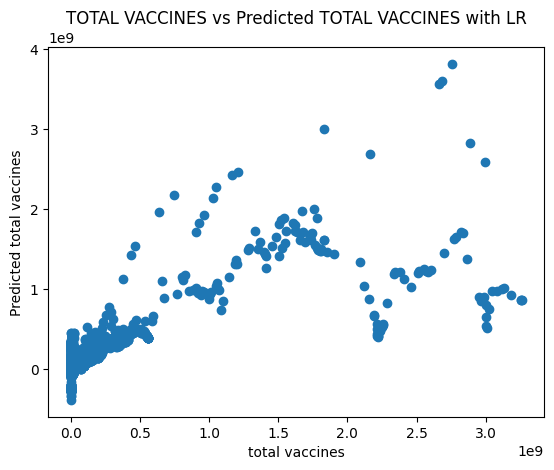

In [52]:
plt.scatter(y_test, y_pred_LR)
plt.xlabel("total vaccines")
plt.ylabel("Predicted total vaccines")
plt.title("TOTAL VACCINES vs Predicted TOTAL VACCINES with LR")
plt.show()

<Axes: >

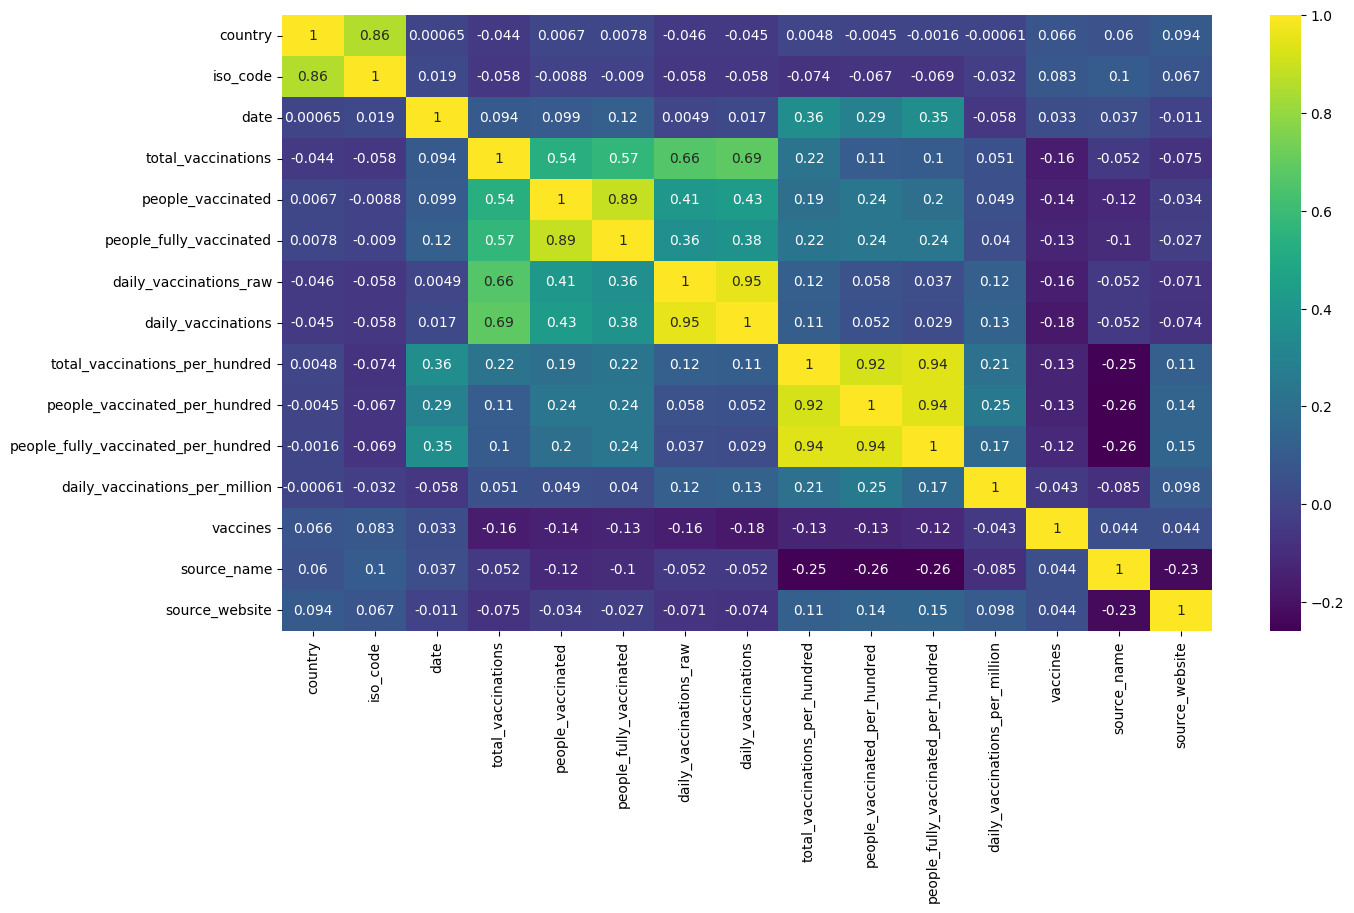

In [54]:
corr = df2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='viridis', annot=True)

# Exploratory Data Analysis

In [69]:
df0.rename(columns = {'total_vaccinations_per_hundred':'total_vaccinations_percent',
                     'people_fully_vaccinated_per_hundred':'people_fully_vaccinated_percent',
                    'people_vaccinated_per_hundred':'people_vaccinated_percent'}, inplace=True)
df0.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_percent', 'people_vaccinated_percent',
       'people_fully_vaccinated_percent', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

Basic info about Dataset

In [70]:
print('Data point starts from:',df0.date.min(),'\n')
print('Data point ends at:',df0.date.max(),'\n')
print('Total no of Countries in the data set:',len(df0.country.unique()),'\n')
print('Total no of unique Vaccine Schemes in the data set:',len(df0.vaccines.unique()),'\n')

Data point starts from: 2020-12-02 

Data point ends at: 2022-03-29 

Total no of Countries in the data set: 223 

Total no of unique Vaccine Schemes in the data set: 84 



In [71]:
df0.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [72]:
# All the different kinds of vaccines
df0.vaccines.unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik Light, Sputnik V',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, S

In [73]:
# Here we are creating `country_data` which store basic info about a country, like the vaccine scheme it uses, total 
# vaccinations completed and its percentage with the population

country_data = df0.copy()
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_percent']

country_data = country_data[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)
country_data.reset_index(inplace = True)

country_data.columns = ['Country', 'Total Vaccinations', 'iso_code', 'Vaccines', 'Total Vaccinations Percentage']
country_data

,Country,Total Vaccinations,iso_code,Vaccines,Total Vaccinations Percentage
0,China,3.263129e+09,CHN,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",225.94
1,India,1.834501e+09,IND,"Covaxin, Oxford/AstraZeneca, Sputnik V",131.66
2,United States,5.601818e+08,USA,"Johnson&Johnson, Moderna, Pfizer/BioNTech",168.72
3,Brazil,4.135596e+08,BRA,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",193.26
4,Indonesia,3.771089e+08,IDN,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",136.45
...,...,...,...,...,...
218,Falkland Islands,4.407000e+03,FLK,Oxford/AstraZeneca,124.91
219,Montserrat,4.211000e+03,MSR,Oxford/AstraZeneca,84.54
220,Niue,4.161000e+03,NIU,Pfizer/BioNTech,257.81
221,Tokelau,1.936000e+03,TKL,Pfizer/BioNTech,141.52


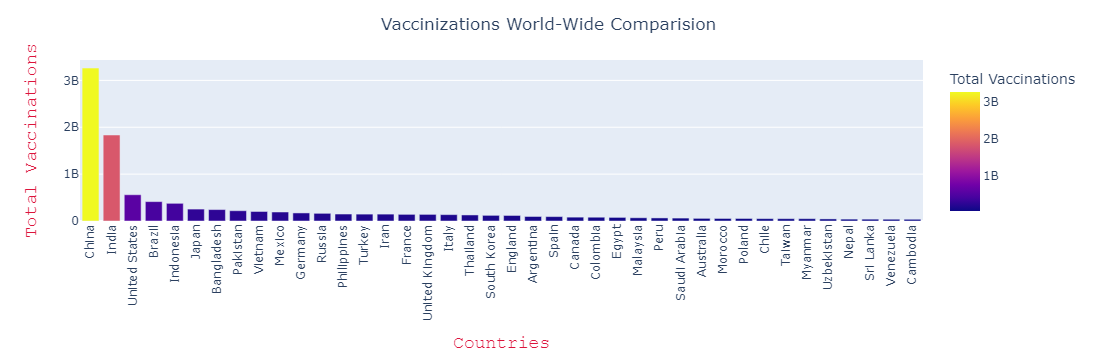

In [74]:
fig = px.bar(country_data[:40], x = 'Country', y = 'Total Vaccinations', color = 'Total Vaccinations')

fig.update_layout(title = dict(text = 'Vaccinizations World-Wide Comparision', x=0.5, y=0.95))
fig.update_xaxes(title = 'Countries', title_font = dict(size=18, family='Courier', color='crimson'), tickangle=-90)
fig.update_yaxes(title = 'Total Vaccinations', title_font = dict(size=18, family='Courier', color='crimson'))

fig.show()

From the plot, some interesting facts stand out:

•	The United States, despite having the highest number of people affected by Covid-19, has the highest number of vaccinated people.
    
•	China, from where the virus started spreading, is at second.

•	India, who has been supplying vaccines to the world is at 3th position.
    
•	UK, where we have found a new variant strain of the virus, is right next.
    
•	Following that, we have Israel, UAE, Brazil, Germany and others


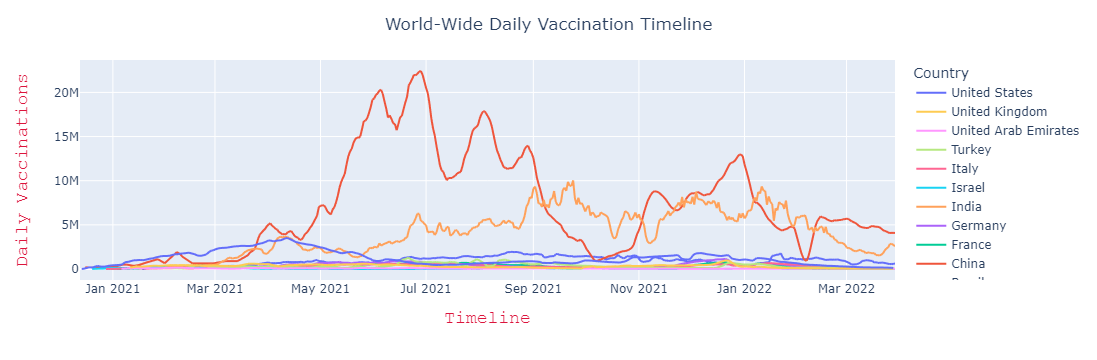

In [75]:
top_countries = ['USA','CHN','GBR','IND','ISR','ARE','BRA','DEU','TUR','ITA','FRA']
fig = px.line(df0[df0.iso_code.isin(top_countries)], x='date', y='daily_vaccinations', color='country')

fig.update_layout(title = dict(text = 'World-Wide Daily Vaccination Timeline', x=0.5, y=0.95), 
                  legend = dict(title = 'Country', traceorder = 'reversed'))
fig.update_xaxes(title = 'Timeline', title_font = dict(size=18, family='Courier', color='crimson'))
fig.update_yaxes(title = 'Daily Vaccinations', title_font = dict(size=18, family='Courier', color='crimson'))

fig.show()
#Country wise daily vaccination

From the plot, we can deduce:

•	The Line plot for China is composed entirely of straight lines. This can be attributed to the CCP which tries to restrict flow of information in and out of China. Thus, information from China usually comes in intervals and can be taken with a grain of salt.
            
•	Comparatively, the plot of vaccinations in the USA is better plotted. We can also see that while the USA was heavily affected by the virus, its vaccination drive is highly effective.
            
•	Others like the UK have a steady increase in Daily Vaccinations and India, while supplying to many countries, maintains a respectable 3th position.


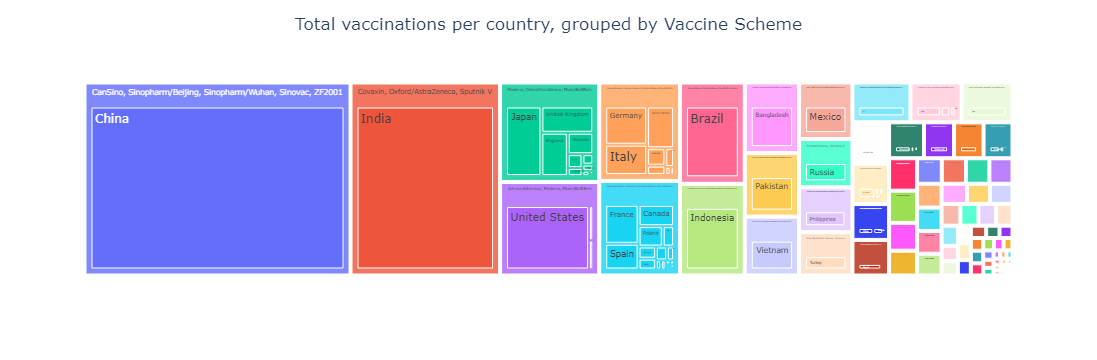

In [76]:
fig = px.treemap(country_data, path = ['Vaccines', 'Country'], values = 'Total Vaccinations', height = 650,
                custom_data = ['Country', 'Vaccines', 'Total Vaccinations'])

fig.update_layout(title = dict(text = 'Total vaccinations per country, grouped by Vaccine Scheme', x=0.5, y=0.95))
fig.update_traces(hovertemplate = 'Country: %{customdata[0]}<br>Vaccine: %{customdata[1]}<br>Total Vaccinations: %{customdata[2]}')
fig.show()

•	From the above Treemap we can realise that a Bar and Pie Plot may often only show a part of the information that can be observed, whereas a Treemap can accurately show the share of a particular vaccine world-wide, the countries that are using the said vaccine and can even show comparisons between all the countries.
    
•	As the Treemap shows so much information at a time, it can help one understand the data much more accurately.


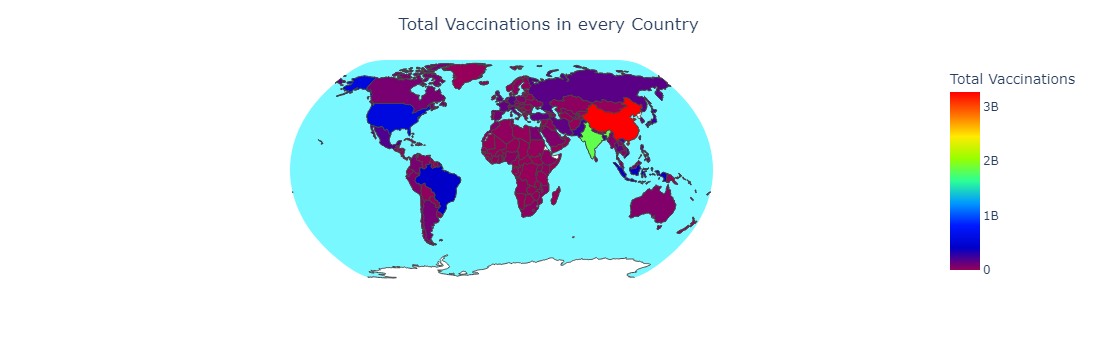

In [77]:
fig = px.choropleth(country_data, locations = 'Country', color = 'Total Vaccinations', 
                    locationmode = 'country names', color_continuous_scale = 'rainbow', 
                    hover_name = 'Country', projection = 'natural earth')

fig.update_layout(title = dict(text = 'Total Vaccinations in every Country', x=0.5, y=0.95), 
                 geo = dict(showocean = True, oceancolor = "#7af8ff", showland = True, 
                            landcolor = "white",showlakes = False, showframe = False))

fig.show()

•	In the above visualisation, we can see the countries and the total vaccinations they have completed.

# Statistical Analysis

Which countries started vaccinations first?

In [82]:
# Find out which countries started vaccinations earliest
df0['date'] = pd.to_datetime(df0['date'], utc=True)
vacc_start = df0.loc[df0[df0.total_vaccinations > 0].groupby('country')['date'].idxmin()].sort_values('date')
vacc_start.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_percent,people_vaccinated_percent,people_fully_vaccinated_percent,daily_vaccinations_per_million,vaccines,source_name,source_website
43117,Latvia,LVA,2020-12-04 00:00:00+00:00,1.0,1.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Novavax, Pfizer/BioN...",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
58523,Norway,NOR,2020-12-08 00:00:00+00:00,5.0,5.0,NaN,5.0,1.0,0.00,0.00,NaN,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
20826,Denmark,DNK,2020-12-08 00:00:00+00:00,1.0,1.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Statens Serum Institute,https://covid19.ssi.dk/overvagningsdata/downlo...
82360,United States,USA,2020-12-13 00:00:00+00:00,30288.0,25125.0,5897.0,NaN,NaN,0.01,0.01,0.0,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
13403,Canada,CAN,2020-12-14 00:00:00+00:00,5.0,5.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html


How have the cumulative number of countries adopting covid-19 vaccinations evolved over time? How is this trend?

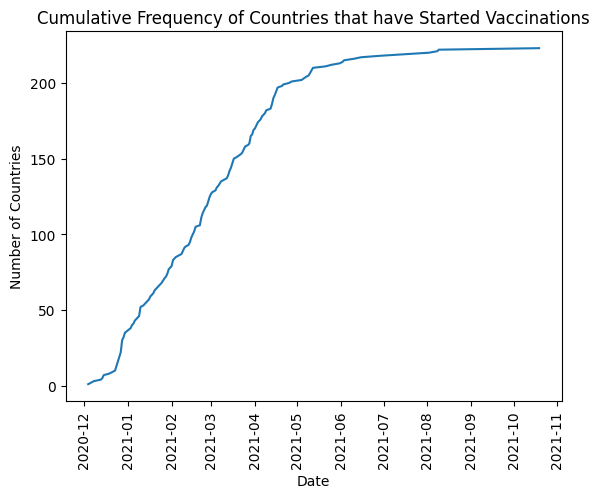

In [83]:
# Cumulative distribution of vaccination start dates
events = pd.Series(vacc_start.date.value_counts())
events.index = pd.to_datetime(events.index)
events.sort_index(inplace=True)

plt.plot(events.cumsum())
plt.xticks(rotation=90)
plt.title('Cumulative Frequency of Countries that have Started Vaccinations')
plt.xlabel('Date')
plt.ylabel('Number of Countries')
plt.show()

What are the top 20 countries in terms of total number of vaccines administered?

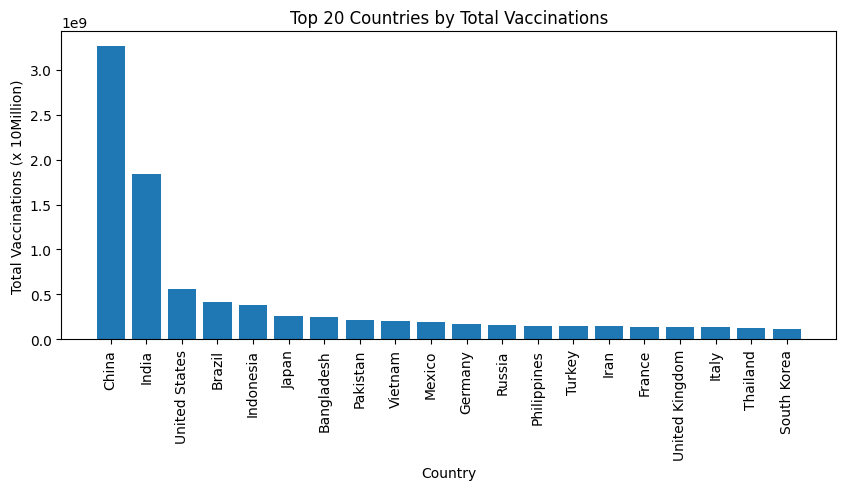

In [86]:
vacc_total = df0.loc[df0.groupby('country')['total_vaccinations'].idxmax()].sort_values('total_vaccinations',ascending=False)
vacc_total = pd.concat((vacc_total,vacc_total["vaccines"].str.split(", ", expand = True)),axis=1)
# Plot out which countries have performed most vaccinations in descending order
plt.figure(figsize=(10, 4)) 
plt.bar(vacc_total.country[0:20], vacc_total.total_vaccinations[0:20])
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Total Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations (x 10Million)')
plt.show()
